In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
folder1 = "Data"
folder2 = "Premier"
años = ["19-20", "20-21", "21-22", "22-23", "23-24"]
torneos = []

for año in años:
    match_file = f"stats_{año}.csv"
    path_matches = os.path.join(folder1, folder2, match_file)
    matches = pd.read_csv(path_matches)
    torneos.append(matches)

In [3]:
for año, torneo in zip(años, torneos):
    print(f"Datos de la temporada {año}")
    pd.set_option('display.max_rows', None)
    print(torneo.isna().sum())
    print(torneo.isna().sum().sum())
    print("-----------------")

Datos de la temporada 19-20
number_of_match                 0
team_home                       4
team_away                       4
home_score                      4
away_score                      4
posession_home                  4
posession_away                  4
total_shots_home                4
total_shots_away                4
shots_on_target_home            4
shots_on_target_away            4
shots_off_target_home           4
shots_off_target_away           4
blocked_shots_home              4
blocked_shots_away              4
corner_kicks_home               4
corner_kicks_away               4
offsides_home                  19
offsides_away                  19
fouls_home                      4
fouls_away                      4
yellow_cards_home              20
yellow_cards_away              20
red_cards_home                  4
red_cards_away                  4
free_kicks_home                 4
free_kicks_away                 4
throw_ins_home                384
throw_ins_away      

Borrare los partidos de cada torneo en que no se hayan registrado los equipos que juegan

In [4]:
for año, torneo in zip(años, torneos):
    torneo.dropna(subset=['team_home', 'team_away'], inplace=True)
    print(f"Datos de la temporada {año}")
    print(torneo.isna().sum())
    print(torneo.isna().sum().sum())
    print("-----------------")

Datos de la temporada 19-20
number_of_match                 0
team_home                       0
team_away                       0
home_score                      0
away_score                      0
posession_home                  0
posession_away                  0
total_shots_home                0
total_shots_away                0
shots_on_target_home            0
shots_on_target_away            0
shots_off_target_home           0
shots_off_target_away           0
blocked_shots_home              0
blocked_shots_away              0
corner_kicks_home               0
corner_kicks_away               0
offsides_home                  15
offsides_away                  15
fouls_home                      0
fouls_away                      0
yellow_cards_home              16
yellow_cards_away              16
red_cards_home                  0
red_cards_away                  0
free_kicks_home                 0
free_kicks_away                 0
throw_ins_home                380
throw_ins_away      

Se borrarán todas las columnas que tengan datos faltantes en alguno de los torneos

In [5]:
columns_with_null = []

for torneo in torneos:
    null_columns = torneo.columns[torneo.isna().any()].tolist()
    columns_with_null.append(null_columns)

unique_columns = list(set(itertools.chain.from_iterable(columns_with_null)))
unique_columns

print(len(unique_columns))
print(unique_columns)
#Borrar para cada torneo las columnas en unique_columns
for torneo in torneos:
    torneo.drop(columns=unique_columns, inplace=True)

22
['hit_woodwork_away', 'clearences_away', 'counter_attacks_home', 'counter_attacks_shots_away', 'yellow_cards_away', 'goalkeeper_saves_away', 'goalkeeper_saves_home', 'offsides_home', 'offsides_away', 'big_chances_home', 'big_chances_missed_away', 'throw_ins_away', 'counter_attacks_shots_home', 'hit_woodwork_home', 'big_chances_away', 'counter_attacks_away', 'big_chances_missed_home', 'possesion_lost_away', 'clearences_home', 'possesion_lost_home', 'throw_ins_home', 'yellow_cards_home']


In [6]:
for año, torneo in zip(años, torneos):
    print(f"Datos de la temporada {año}")
    print(torneo.isna().sum())
    print(torneo.isna().sum().sum())
    print("-----------------")

Datos de la temporada 19-20
number_of_match           0
team_home                 0
team_away                 0
home_score                0
away_score                0
posession_home            0
posession_away            0
total_shots_home          0
total_shots_away          0
shots_on_target_home      0
shots_on_target_away      0
shots_off_target_home     0
shots_off_target_away     0
blocked_shots_home        0
blocked_shots_away        0
corner_kicks_home         0
corner_kicks_away         0
fouls_home                0
fouls_away                0
red_cards_home            0
red_cards_away            0
free_kicks_home           0
free_kicks_away           0
goal_kicks_home           0
goal_kicks_away           0
shots_inside_box_home     0
shots_inside_box_away     0
shots_outside_box_home    0
shots_outside_box_away    0
passes_home               0
passes_away               0
accurate_passes_home      0
accurate_passes_away      0
long_balls_home           0
long_balls_away     

In [7]:
torneos2 = []

for torneo in torneos:
    torneo.sort_values(by='number_of_match', inplace=True)
    torneo.rename(columns={'home_score': 'score_home', 'away_score': 'score_away'}, inplace=True)

    ##OJOO arreglar tema de equipos
    team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
    teams_to_remove = team_counts[team_counts < 5].index

    torneo = torneo[~(torneo['team_home'].isin(teams_to_remove) | torneo['team_away'].isin(teams_to_remove))]
    torneos2.append(torneo)


C:\Users\Diego\AppData\Local\Temp/ipykernel_15924/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
C:\Users\Diego\AppData\Local\Temp/ipykernel_15924/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
C:\Users\Diego\AppData\Local\Temp/ipykernel_15924/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
C:\Users\Diego\AppData\Local\Temp/ipykernel_15924/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a fu

In [8]:
torneos = torneos2
torneos[0].head()

,number_of_match,team_home,team_away,score_home,score_away,posession_home,posession_away,total_shots_home,total_shots_away,shots_on_target_home,...,dribbles_home,dribbles_away,duels_won_home,duels_won_away,aerials_won_home,aerials_won_away,tackles_home,tackles_away,interceptions_home,interceptions_away
5,0,Liverpool,Norwich City,4.0,1.0,57.0,43.0,15.0,12.0,7.0,...,11.0,10.0,56.0,38.0,15.0,7.0,21.0,12.0,14.0,11.0
34,1,West Ham United,Manchester City,0.0,5.0,42.0,58.0,5.0,14.0,3.0,...,8.0,13.0,57.0,54.0,18.0,17.0,18.0,18.0,9.0,13.0
0,2,Bournemouth,Sheffield United,1.0,1.0,52.0,48.0,13.0,8.0,3.0,...,8.0,6.0,56.0,49.0,14.0,21.0,18.0,14.0,13.0,14.0
21,3,Burnley,Southampton,3.0,0.0,46.0,54.0,10.0,11.0,4.0,...,14.0,6.0,68.0,41.0,23.0,22.0,21.0,7.0,14.0,10.0
11,4,Crystal Palace,Everton,0.0,0.0,35.0,65.0,6.0,10.0,2.0,...,8.0,5.0,71.0,53.0,30.0,18.0,21.0,14.0,10.0,14.0


Ahora se generara la tabla para cada torneo

In [9]:
def remove_suffix(item):
    return item.replace("_home", "").replace("_away", "")

column = [remove_suffix(item) for item in matches.columns]
columnas = []
[columnas.append(x) for x in column if x not in columnas]
columnas.remove("number_of_match")
columnas.remove("team")
columnas[0] = "score_prom"
print(columnas)
print(len(columnas))

['score_prom', 'posession', 'total_shots', 'shots_on_target', 'shots_off_target', 'blocked_shots', 'corner_kicks', 'fouls', 'red_cards', 'free_kicks', 'goal_kicks', 'shots_inside_box', 'shots_outside_box', 'passes', 'accurate_passes', 'long_balls', 'crosses', 'dribbles', 'duels_won', 'aerials_won', 'tackles', 'interceptions']
22


In [10]:
columnas.append("wins")
columnas.append("ties")
columnas.append("losses")
columnas.append("total_goals")
columnas.append("total_goals_conceded")
columnas.append("points")
columnas.append("streak")
columnas.append("wins_in_last_5_matches")
columnas.append("ties_in_last_5_matches")
columnas.append("losses_in_last_5_matches")

In [11]:
tablas = []

for torneo, i in zip(torneos, range(len(torneos))):
    
    equipos = torneo["team_home"].unique()
    equipos2 = torneo["team_away"].unique()
    print(len(equipos), len(equipos2))
    print(equipos)
    stats = columnas

    tabla = {}

    for equipo in equipos:

        tabla[equipo] = dict.fromkeys(stats, 0)
        tabla[equipo]["last_5_matches"] = list()

    tablas.append(tabla)

20 20
['Liverpool' 'West Ham United' 'Bournemouth' 'Burnley' 'Crystal Palace'
 'Watford' 'Tottenham' 'Newcastle United' 'Manchester United' 'Arsenal'
 'Aston Villa' 'Brighton & Hove Albion' 'Everton' 'Norwich City'
 'Southampton' 'Manchester City' 'Sheffield United' 'Chelsea'
 'Wolverhampton' 'Leicester City']
20 20
['Fulham' 'Crystal Palace' 'Liverpool' 'West Ham United'
 'West Bromwich Albion' 'Tottenham' 'Sheffield United'
 'Brighton & Hove Albion' 'Burnley' 'Manchester City' 'Everton'
 'Leeds United' 'Manchester United' 'Arsenal' 'Southampton'
 'Newcastle United' 'Chelsea' 'Leicester City' 'Aston Villa'
 'Wolverhampton']
21 21
['Brentford' 'Manchester United' 'Burnley' 'Chelsea' 'Everton'
 'Leicester City' 'Watford' 'Norwich City' 'Newcastle United' 'Tottenham'
 'Liverpool' 'Aston Villa' 'Crystal Palace' 'Leeds United'
 'Manchester City' 'Brighton & Hove Albion' 'Southampton' 'Wolverhampton'
 'Arsenal' 'West Ham United' 'Tottenham Hotspur']
22 22
['Crystal Palace' 'Fulham' 'AFC Bou

In [12]:
new_stats = ["wins",
"ties",
"losses",
"total_goals",
"total_goals_conceded",
"points",
"streak",
"wins_in_last_5_matches",
"ties_in_last_5_matches",
"losses_in_last_5_matches"]
procesated_matches_columns = list(torneos[0].columns)
procesated_matches_columns.insert(5, "score_prom_away")
procesated_matches_columns.insert(5, "score_prom_home")

for stat in new_stats:
    procesated_matches_columns.append(f"{stat}_home")
    procesated_matches_columns.append(f"{stat}_away")

procesated_matches = pd.DataFrame(columns = procesated_matches_columns)

procesated_matches.head()

,number_of_match,team_home,team_away,score_home,score_away,score_prom_home,score_prom_away,posession_home,posession_away,total_shots_home,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away


In [13]:
for torneo, i in zip(torneos, range(len(torneos))):
    tabla = tablas[i]
    for index in torneo.index:
    
        """Escribir info en el nuevo df de partidos con la información hasta el partido la cual esta almacenada en 'tabla'"""
        match = torneo.loc[index]
        team_home = match["team_home"]
        team_away = match["team_away"]

        stats_home = tabla[team_home]
        stats_away = tabla[team_away]

        fila = []
        fila.append(match["number_of_match"])
        fila.append(team_home)
        fila.append(team_away)
        fila.append(match["score_home"])
        fila.append(match["score_away"])

        for stat in stats:
            
            fila.append(tabla[team_home][stat])
            fila.append(tabla[team_away][stat])
        
        procesated_matches.loc[len(procesated_matches)] = fila
        
        """ Actualizar la tabla con lo que realmente ocurrió en ese partido"""

        matches_played_home = tabla[team_home]["wins"] + tabla[team_home]["ties"] + tabla[team_home]["losses"]+1
        matches_played_away = tabla[team_away]["wins"] + tabla[team_away]["ties"] + tabla[team_away]["losses"]+1
        
        ## stats promediadas:
        for stat in stats[:stats.index("wins")]:
            if stat == "score_prom":
                tabla[team_home][stat] = (tabla[team_home][stat]*(matches_played_home-1) + match["score_home"])/matches_played_home
                tabla[team_away][stat] = (tabla[team_away][stat]*(matches_played_away-1) + match["score_away"])/matches_played_away
            else:
                tabla[team_home][stat] = (tabla[team_home][stat]*(matches_played_home-1) + match[f"{stat}_home"])/matches_played_home
                tabla[team_away][stat] = (tabla[team_away][stat]*(matches_played_away-1) + match[f"{stat}_away"])/matches_played_away
            
        ## stats acumuladas
        
        empate = False
        if match["score_home"] > match["score_away"]:

            #victorias / derrotas
            tabla[team_home]["wins"] += 1
            tabla[team_away]["losses"] += 1

            #goles a favor
            tabla[team_home]["total_goals"] += match["score_home"]
            tabla[team_away]["total_goals"] += match["score_away"]

            #goles en contra
            tabla[team_home]["total_goals_conceded"] += match["score_away"]
            tabla[team_away]["total_goals_conceded"] += match["score_home"]

            #puntos
            tabla[team_home]["points"] += 3

            # racha
            tabla[team_home]["streak"] += 1
            tabla[team_away]["streak"] = 0

            # ultimos 5 partidos
            if len(tabla[team_home]["last_5_matches"]) == 5:
                tabla[team_home]["last_5_matches"].pop(0)
            if len(tabla[team_away]["last_5_matches"]) == 5:
                tabla[team_away]["last_5_matches"].pop(0)

            tabla[team_home]["last_5_matches"].append("W")
            tabla[team_away]["last_5_matches"].append("L")


        elif match["score_home"] < match["score_away"]:

            #victorias / derrotas
            tabla[team_away]["wins"] += 1
            tabla[team_home]["losses"] += 1

            #goles a favor
            tabla[team_away]["total_goals"] += match["score_away"]
            tabla[team_home]["total_goals"] += match["score_home"]

            #goles en contra
            tabla[team_away]["total_goals_conceded"] += match["score_home"]
            tabla[team_home]["total_goals_conceded"] += match["score_away"]

            #puntos
            tabla[team_away]["points"] += 3

            # racha
            tabla[team_away]["streak"] += 1
            tabla[team_home]["streak"] = 0

            # ultimos 5 partidos
            if len(tabla[team_home]["last_5_matches"]) == 5:
                tabla[team_home]["last_5_matches"].pop(0)
            if len(tabla[team_away]["last_5_matches"]) == 5:
                tabla[team_away]["last_5_matches"].pop(0)

            tabla[team_away]["last_5_matches"].append("W")
            tabla[team_home]["last_5_matches"].append("L")

        else:
            #empate
            tabla[team_home]["ties"] += 1
            tabla[team_away]["ties"] += 1

            #goles a favor
            tabla[team_home]["total_goals"] += match["score_home"]
            tabla[team_away]["total_goals"] += match["score_away"]

            #goles en contra
            tabla[team_home]["total_goals_conceded"] += match["score_away"]
            tabla[team_away]["total_goals_conceded"] += match["score_home"]

            #puntos
            tabla[team_home]["points"] += 1
            tabla[team_away]["points"] += 1

            # racha
            tabla[team_away]["streak"] += 1
            tabla[team_home]["streak"] += 1

            # ultimos 5 partidos
            if len(tabla[team_home]["last_5_matches"]) == 5:
                tabla[team_home]["last_5_matches"].pop(0)
            if len(tabla[team_away]["last_5_matches"]) == 5:
                tabla[team_away]["last_5_matches"].pop(0)

            tabla[team_away]["last_5_matches"].append("T")
            tabla[team_home]["last_5_matches"].append("T")

        tabla[team_home]["wins_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("W")
        tabla[team_home]["ties_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("T")
        tabla[team_home]["losses_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("L")

        tabla[team_away]["wins_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("W")
        tabla[team_away]["ties_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("T")
        tabla[team_away]["losses_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("L")

In [14]:
matches = procesated_matches

In [15]:
matches.tail()

,number_of_match,team_home,team_away,score_home,score_away,score_prom_home,score_prom_away,posession_home,posession_away,total_shots_home,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away
1639,129,Everton,Manchester United,0.0,3.0,1.181818,1.083333,41.636364,54.250000,14.272727,...,13,21,2,2,3,4,0,0,2,1
1640,130,Fulham,Wolverhampton,3.0,2.0,0.833333,1.333333,48.750000,47.833333,11.083333,...,12,15,0,1,1,2,1,2,3,1
1641,131,Arsenal,Wolverhampton,2.0,1.0,2.076923,1.384615,61.230769,47.230769,14.538462,...,30,15,2,0,3,2,1,1,1,2
1642,132,Brentford,Luton Town,3.0,1.0,1.461538,0.923077,46.923077,35.769231,14.153846,...,16,9,0,1,3,1,0,2,2,2
1643,147,Aston Villa,Manchester City,1.0,0.0,2.384615,2.538462,52.538462,62.384615,14.923077,...,28,29,2,5,4,3,0,2,1,0


# ML

In [16]:
results = []

for index in matches.index:

    match = matches.loc[index]
    if match["score_home"] > match["score_away"]:
        results.append(1)
    elif match["score_home"] < match["score_away"]:
        results.append(2)
    else:
        results.append(0)

matches["result"] = results

In [17]:
for i in range(0,3):
    cantidad = matches[matches["result"]==i].shape[0]
    print(f"Resultado {i}, hay: {cantidad} partidos, {cantidad*100/len(matches)}%")

Resultado 0, hay: 371 partidos, 22.5669099756691%
Resultado 1, hay: 722 partidos, 43.91727493917275%
Resultado 2, hay: 551 partidos, 33.51581508515815%


In [18]:
# Separar el último torneo del resto

cant_partidos_ultima_temp = len(torneos[-1])

matches_train = matches.iloc[:-cant_partidos_ultima_temp]
matches_test = matches.iloc[-cant_partidos_ultima_temp:]

In [19]:
matches_train.shape, matches_test.shape

((1512, 70), (132, 70))

In [20]:
result_train = matches_train["result"]
result_test = matches_test["result"]
matches_train = matches_train.drop(columns = ["team_home", "team_away", "result", "score_home", "score_away", "number_of_match"])
matches_test = matches_test.drop(columns = ["team_home", "team_away", "result", "score_home", "score_away", "number_of_match"])

matches_train.tail(), matches_test.tail()

(      score_prom_home  score_prom_away  posession_home  posession_away  \
 1507         0.891892         1.142857       42.702703       40.500000   
 1508         1.270270         1.783784       46.810811       50.000000   
 1509         1.324324         0.880000       47.648649       44.120000   
 1510         1.513514         1.459459       53.810811       48.675676   
 1511         0.864865         1.918919       44.837838       60.810811   
 
       total_shots_home  total_shots_away  shots_on_target_home  \
 1507         11.243243         11.142857              3.945946   
 1508         11.972973         13.702703              3.864865   
 1509         10.945946         12.880000              4.000000   
 1510         15.459459         11.324324              5.594595   
 1511         10.864865         15.540541              3.567568   
 
       shots_on_target_away  shots_off_target_home  shots_off_target_away  ...  \
 1507              4.000000               4.054054            

In [21]:
X = matches_train.to_numpy()
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)
y_train = result_train

In [22]:
X_test = scaler.transform(matches_test.to_numpy())
y_test = result_test

In [23]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(X_train, y_train)

predicted_logistic_reg = logistic_reg.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_logistic_reg))

Clasification report
              precision    recall  f1-score   support

           0       0.40      0.16      0.23        25
           1       0.54      0.79      0.64        61
           2       0.48      0.35      0.41        46

    accuracy                           0.52       132
   macro avg       0.47      0.43      0.42       132
weighted avg       0.49      0.52      0.48       132



In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


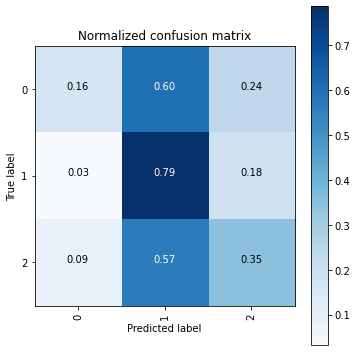

In [25]:
cnf_matrix = confusion_matrix(y_test, predicted_logistic_reg)
np.set_printoptions(precision=2)
classes = np.unique(y_train)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## SVM

In [26]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        f"For kernel = {kernel}, the accuracy is: {acc}"
    )


For kernel = linear, the accuracy is: 0.5
For kernel = poly, the accuracy is: 0.48484848484848486
For kernel = rbf, the accuracy is: 0.5303030303030303
For kernel = sigmoid, the accuracy is: 0.4772727272727273


In [27]:
from sklearn.svm import SVC

svm = SVC(kernel = "rbf")

svm.fit(X_train, y_train)

predicted_svm = svm.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_svm))

Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.56      0.82      0.66        61
           2       0.49      0.43      0.46        46

    accuracy                           0.53       132
   macro avg       0.35      0.42      0.37       132
weighted avg       0.43      0.53      0.47       132



Normalized confusion matrix


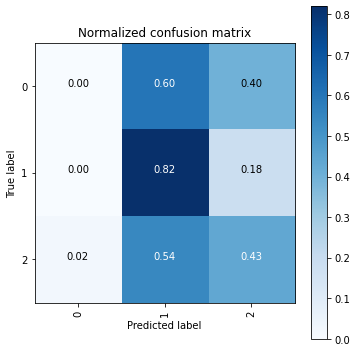

In [28]:
cnf_matrix = confusion_matrix(y_test, predicted_svm)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

range_T = [50, 100, 200, 500, 1000]


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=50, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 50 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=20, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 20 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=10, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 10 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=5, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For min_samples_split = 50 and t = 50 The accuracy is : 0.5757575757575758
For min_samples_split = 50 and t = 100 The accuracy is : 0.5681818181818182
For min_samples_split = 50 and t = 200 The accuracy is : 0.5833333333333334
For min_samples_split = 50 and t = 500 The accuracy is : 0.5757575757575758
For min_samples_split = 50 and t = 1000 The accuracy is : 0.5606060606060606
For min_samples_split = 20 and t = 50 The accuracy is : 0.5681818181818182
For min_samples_split = 20 and t = 100 The accuracy is : 0.5681818181818182
For min_samples_split = 20 and t = 200 The accuracy is : 0.5757575757575758
For min_samples_split = 20 and t = 500 The accuracy is : 0.5681818181818182
For min_samples_split = 20 and t = 1000 The accuracy is : 0.5757575757575758
For min_samples_split = 10 and t = 50 The accuracy is : 0.5681818181818182
For min_samples_split = 10 and t = 100 The accuracy is : 0.553030303030303
For min_samples_split = 10 and t = 200 The accuracy is : 0.5303030303030303
For min_sample

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(min_samples_split=50, n_estimators=200, random_state=0)

rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_rf))

Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.59      0.82      0.68        61
           2       0.57      0.59      0.58        46

    accuracy                           0.58       132
   macro avg       0.39      0.47      0.42       132
weighted avg       0.47      0.58      0.52       132



c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Normalized confusion matrix


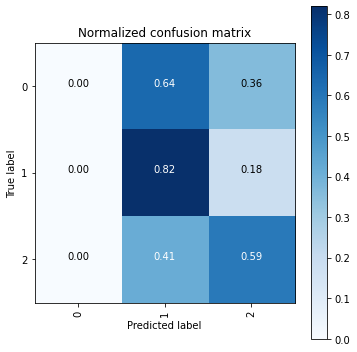

In [27]:
cnf_matrix = confusion_matrix(y_test, predicted_rf)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.4393939393939394
For max_depth = 2 and t = 100 The accuracy is : 0.4090909090909091
For max_depth = 2 and t = 200 The accuracy is : 0.42424242424242425
For max_depth = 2 and t = 500 The accuracy is : 0.5
For max_depth = 2 and t = 1000 The accuracy is : 0.4696969696969697
For max_depth = 3 and t = 50 The accuracy is : 0.4166666666666667
For max_depth = 3 and t = 100 The accuracy is : 0.4166666666666667
For max_depth = 3 and t = 200 The accuracy is : 0.4772727272727273
For max_depth = 3 and t = 500 The accuracy is : 0.48484848484848486
For max_depth = 3 and t = 1000 The accuracy is : 0.5378787878787878
For max_depth = 4 and t = 50 The accuracy is : 0.48484848484848486
For max_depth = 4 and t = 100 The accuracy is : 0.5075757575757576
For max_depth = 4 and t = 200 The accuracy is : 0.49242424242424243
For max_depth = 4 and t = 500 The accuracy is : 0.5151515151515151
For max_depth = 4 and t = 1000 The accuracy is : 0.5
For max_depth = 5 and

In [33]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=1000, random_state=0)

ada.fit(X_train, y_train)

predicted_ada = ada.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_ada))

Clasification report
              precision    recall  f1-score   support

           0       0.36      0.20      0.26        25
           1       0.57      0.69      0.62        61
           2       0.55      0.52      0.53        46

    accuracy                           0.54       132
   macro avg       0.49      0.47      0.47       132
weighted avg       0.52      0.54      0.52       132



Normalized confusion matrix


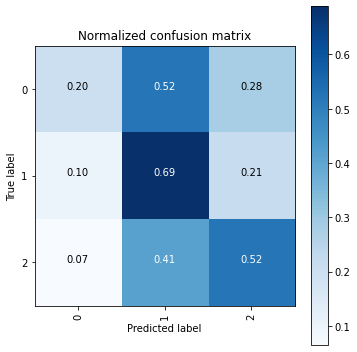

In [34]:
cnf_matrix = confusion_matrix(y_test, predicted_ada)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## GradientBoosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =3, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =4, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =6, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =7, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =8, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.553030303030303
For max_depth = 2 and t = 100 The accuracy is : 0.5757575757575758
For max_depth = 2 and t = 200 The accuracy is : 0.5
For max_depth = 2 and t = 500 The accuracy is : 0.5
For max_depth = 2 and t = 1000 The accuracy is : 0.4696969696969697
For max_depth = 3 and t = 50 The accuracy is : 0.5075757575757576
For max_depth = 3 and t = 100 The accuracy is : 0.4772727272727273
For max_depth = 3 and t = 200 The accuracy is : 0.48484848484848486
For max_depth = 3 and t = 500 The accuracy is : 0.4772727272727273
For max_depth = 3 and t = 1000 The accuracy is : 0.45454545454545453
For max_depth = 4 and t = 50 The accuracy is : 0.5378787878787878
For max_depth = 4 and t = 100 The accuracy is : 0.5075757575757576
For max_depth = 4 and t = 200 The accuracy is : 0.5151515151515151
For max_depth = 4 and t = 500 The accuracy is : 0.48484848484848486
For max_depth = 4 and t = 1000 The accuracy is : 0.48484848484848486
For max_depth = 5 and 

In [36]:
gb = GradientBoostingClassifier(n_estimators=2, max_depth =100, random_state=0)

gb.fit(X_train, y_train)

predicted_gb = gb.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_gb))

Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.46      0.74      0.57        61
           2       0.37      0.22      0.27        46

    accuracy                           0.42       132
   macro avg       0.28      0.32      0.28       132
weighted avg       0.34      0.42      0.36       132



Normalized confusion matrix


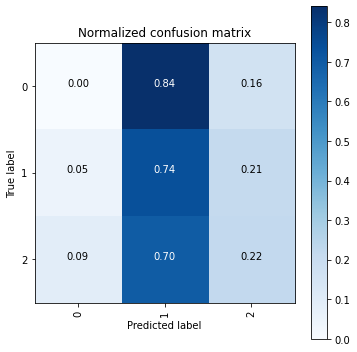

In [37]:
cnf_matrix = confusion_matrix(y_test, predicted_gb)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## XGboost

In [38]:
from xgboost import XGBClassifier


range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =3, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =4, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =6, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =7, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =8, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

For max_depth = 2 and t = 50 The accuracy is : 0.5075757575757576
For max_depth = 2 and t = 100 The accuracy is : 0.4621212121212121
For max_depth = 2 and t = 200 The accuracy is : 0.5151515151515151
For max_depth = 2 and t = 500 The accuracy is : 0.4621212121212121
For max_depth = 2 and t = 1000 The accuracy is : 0.49242424242424243
For max_depth = 3 and t = 50 The accuracy is : 0.49242424242424243
For max_depth = 3 and t = 100 The accuracy is : 0.4696969696969697
For max_depth = 3 and t = 200 The accuracy is : 0.4772727272727273
For max_depth = 3 and t = 500 The accuracy is : 0.44696969696969696
For max_depth = 3 and t = 1000 The accuracy is : 0.4696969696969697
For max_depth = 4 and t = 50 The accuracy is : 0.5075757575757576
For max_depth = 4 and t = 100 The accuracy is : 0.4772727272727273
For max_depth = 4 and t = 200 The accuracy is : 0.5075757575757576
For max_depth = 4 and t = 500 The accuracy is : 0.5151515151515151
For max_depth = 4 and t = 1000 The accuracy is : 0.492424242

In [39]:
xgb = XGBClassifier(max_depth = 2, n_estimators = 200)

xgb.fit(X_train, y_train)

predicted_xgb = xgb.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_xgb))


Clasification report
              precision    recall  f1-score   support

           0       0.29      0.36      0.32        25
           1       0.59      0.72      0.65        61
           2       0.56      0.33      0.41        46

    accuracy                           0.52       132
   macro avg       0.48      0.47      0.46       132
weighted avg       0.52      0.52      0.51       132



Normalized confusion matrix


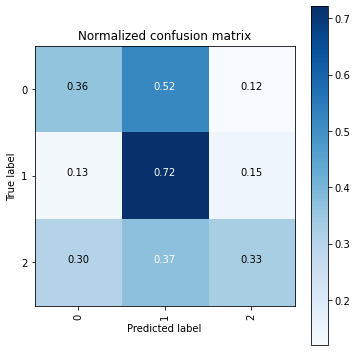

In [40]:
cnf_matrix = confusion_matrix(y_test, predicted_xgb)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## MLP

In [41]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Embedding, Concatenate
from tensorflow.keras.models import Model

mlp = Sequential([
    Input(shape = X_train[0].shape[0]),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(32, activation= "relu"),
    Dense(3, activation = "softmax")
])

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 18755 (73.26 KB)
Trainable params: 18755 (73.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=3) # Conjunto de validación = 0.8*0.25 = 0.2, este valor es estándar para validación

y_train2 = keras.utils.to_categorical(y_train2, 3)
y_val = keras.utils.to_categorical(y_val, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [43]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Ajusta la función de pérdida según el tipo de problema categorical es para multi clases
mlp.fit(X_train2, y_train2, batch_size=256, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 1s 42ms/step - loss: 1.1544 - accuracy: 0.3333 - val_loss: 1.0606 - val_accuracy: 0.4418
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0333 - accuracy: 0.4894 - val_loss: 1.0375 - val_accuracy: 0.4921
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.9938 - accuracy: 0.5176 - val_loss: 1.0256 - val_accuracy: 0.5053
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.9674 - accuracy: 0.5432 - val_loss: 1.0209 - val_accuracy: 0.5079
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.9506 - accuracy: 0.5556 - val_loss: 1.0214 - val_accuracy: 0.5132
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.9374 - accuracy: 0.5705 - val_loss: 1.0234 - val_accuracy: 0.5000
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.9242 - accuracy: 0.5829 - val_loss: 1.0260 - val_accuracy: 0.4947
Epoch 8/100
5/5 [=========

In [44]:
predicted_mlp = mlp.predict(X_test)
predicted_mlp = [np.argmax(x) for x in predicted_mlp]
y_test = [np.argmax(x) for x in y_test]

5/5 [==============================] - 0s 1ms/step


In [45]:
print("Clasification report")
print(classification_report(y_test, predicted_mlp))

Clasification report
              precision    recall  f1-score   support

           0       0.17      0.20      0.19        25
           1       0.58      0.56      0.57        61
           2       0.41      0.39      0.40        46

    accuracy                           0.43       132
   macro avg       0.39      0.38      0.38       132
weighted avg       0.44      0.43      0.44       132



Normalized confusion matrix


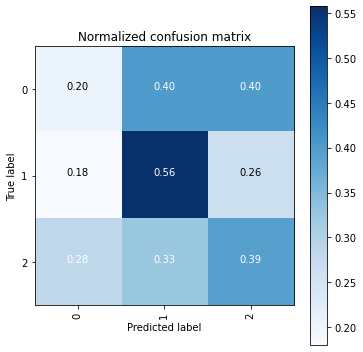

In [46]:
cnf_matrix = confusion_matrix(y_test, predicted_mlp)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

In [43]:
y_test = np.array(y_test)

In [44]:
# Explainer para random_forest
indices_correctos = []
indices_visita = []
for i in range(len(X_test)):
    if y_test[i] == predicted_rf[i]:
        indices_correctos.append(i)
        if predicted_rf[i] == 2:
            indices_visita.append(i)
indices_correctos
print(indices_visita)


[13, 21, 24, 27, 28, 29, 33, 40, 43, 45, 48, 54, 59, 61, 69, 70, 71, 87, 90, 95, 99, 100, 111, 123, 125, 126, 127]


In [45]:
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline

ejemplo = scaler.inverse_transform(X_test[1].reshape(1,-1))[0]
feature_names = list(matches_train.columns)
class_names = ['empate','victoria_casa','victoria_visita']
c = make_pipeline(scaler, rf)
explainer = lime.lime_tabular.LimeTabularExplainer(matches_train.values, feature_names = feature_names, class_names=class_names, mode='classification')
table = explainer.explain_instance(ejemplo, c.predict_proba, num_features= 5, top_labels=3)
table.show_in_notebook(show_table = True)
print("Predicción: ", class_names[rf.predict(X_test[1].reshape(1,-1))[0]])
print("Real: ", class_names[y_test[1]])
    

Predicción:  victoria_casa
Real:  victoria_casa


In [46]:
ejemplo2 = scaler.inverse_transform(X_test[54].reshape(1,-1))[0]
table2 = explainer.explain_instance(ejemplo2, rf.predict_proba, num_features= 5, top_labels=3)
table2.show_in_notebook(show_table = True)
print("Predicción: ", class_names[rf.predict(X_test[29].reshape(1,-1))[0]])
print("Real: ", class_names[y_test[29]])

Predicción:  victoria_visita
Real:  victoria_visita


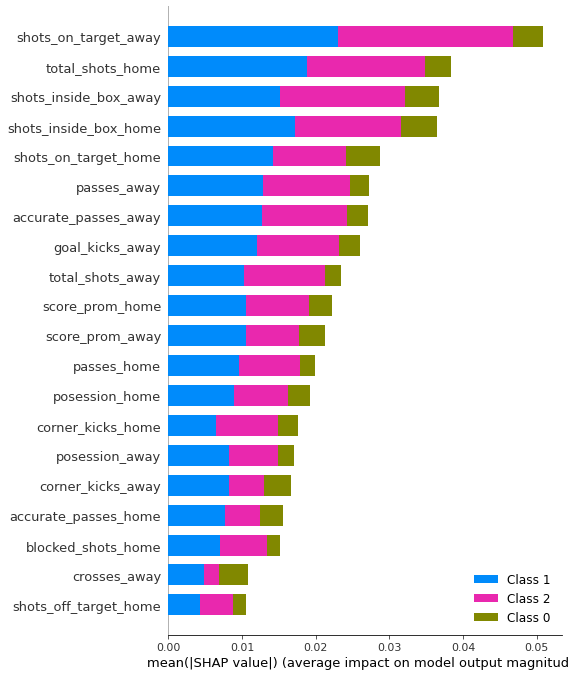

In [47]:
import shap

explainer2 = shap.TreeExplainer(rf)
shap_values = explainer2.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = matches_train.columns)


PermutationExplainer explainer: 133it [01:00,  1.83it/s]                         


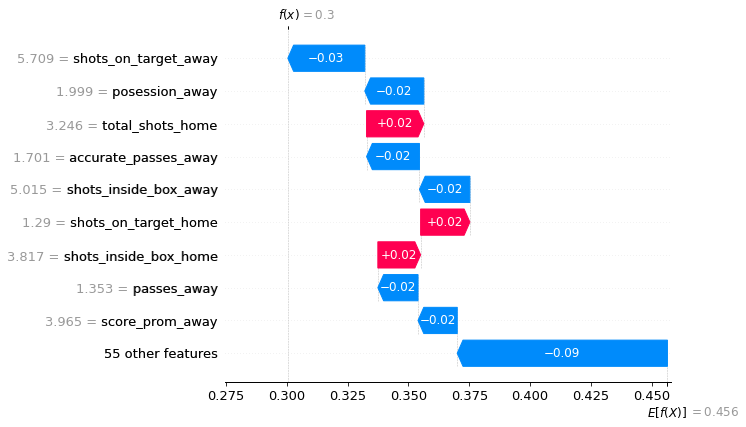

In [48]:
def f(x):
    return rf.predict_proba(x)[:,1]

explainer3 = shap.Explainer(f, X_train, feature_names = matches_train.columns)
shap_values = explainer3(X_test)
shap.plots.waterfall(shap_values[13])

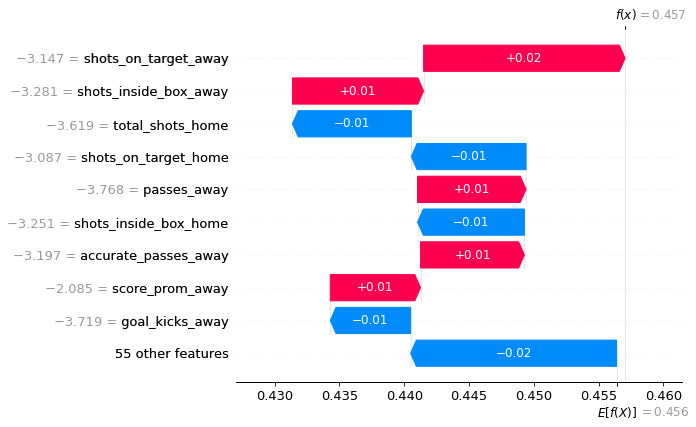

In [49]:
shap.plots.waterfall(shap_values[1])

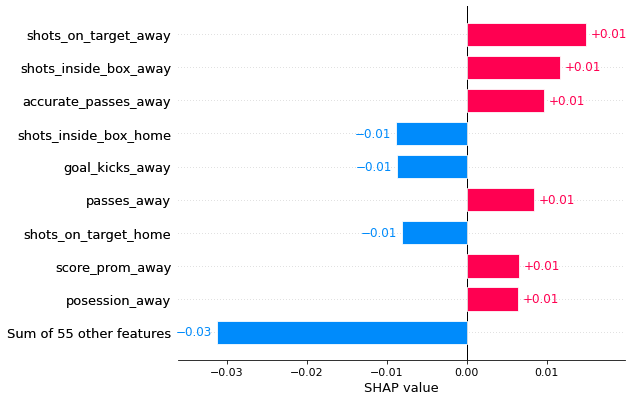

In [50]:
shap.plots.bar(shap_values[0])

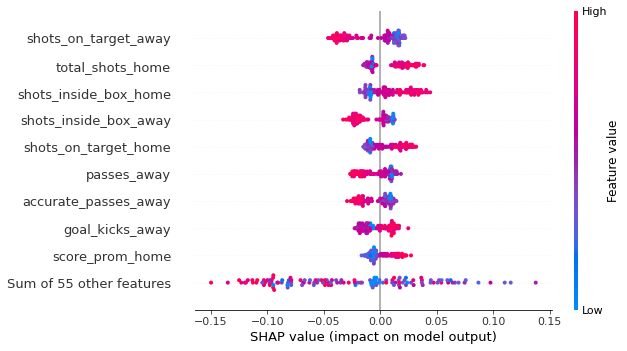

In [51]:
shap.plots.beeswarm(shap_values)